In [17]:
# Import modules 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, shapiro
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\general_purpose_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\A. Performance analysis/performance_analysis_functions.ipynb"

#### Read data

In [18]:
csv_file_path='C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv'
runs = pd.read_csv(csv_file_path)

In [19]:
runs.head()

,Unnamed: 0,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,...,latency_to_cp_entry,latency_to_cp_exit,time_in_cp,session_nr,outcome_shifted,stim_condition_shifted,latency_to_cp_entry_shifted,time_in_cp_shifted,inv_latency_to_cp_entry,inv_time_in_cp
0,314,2020-02-07T14_40_27,CTRL2,4.0,249.267494,T,0,1.0,CTRL,255.618688,...,6.351194,6.844365,0.493171,1.0,1.0,3.0,9.956634,0.861824,0.157451,2.027693
1,315,2020-02-07T14_40_27,CTRL2,6.0,343.622938,T,0,1.0,CTRL,348.707610,...,5.084672,6.678118,1.593446,1.0,1.0,0.0,6.351194,0.493171,0.196670,0.627571
2,318,2020-02-07T14_40_27,CTRL2,14.0,838.605722,T,0,0.0,CTRL,841.648947,...,3.043226,4.163149,1.119923,1.0,1.0,3.0,3.279386,0.495334,0.328599,0.892918
3,319,2020-02-07T14_40_27,CTRL2,18.0,1040.366630,T,0,0.0,CTRL,1044.466278,...,4.099648,4.628557,0.528909,1.0,0.0,0.0,3.043226,1.119923,0.243923,1.890685
4,320,2020-02-07T14_40_27,CTRL2,26.0,1487.470285,T,0,1.0,CTRL,1489.321690,...,1.851405,2.483725,0.632320,1.0,0.0,0.0,4.099648,0.528909,0.540130,1.581478


#### Plot pooled performances 

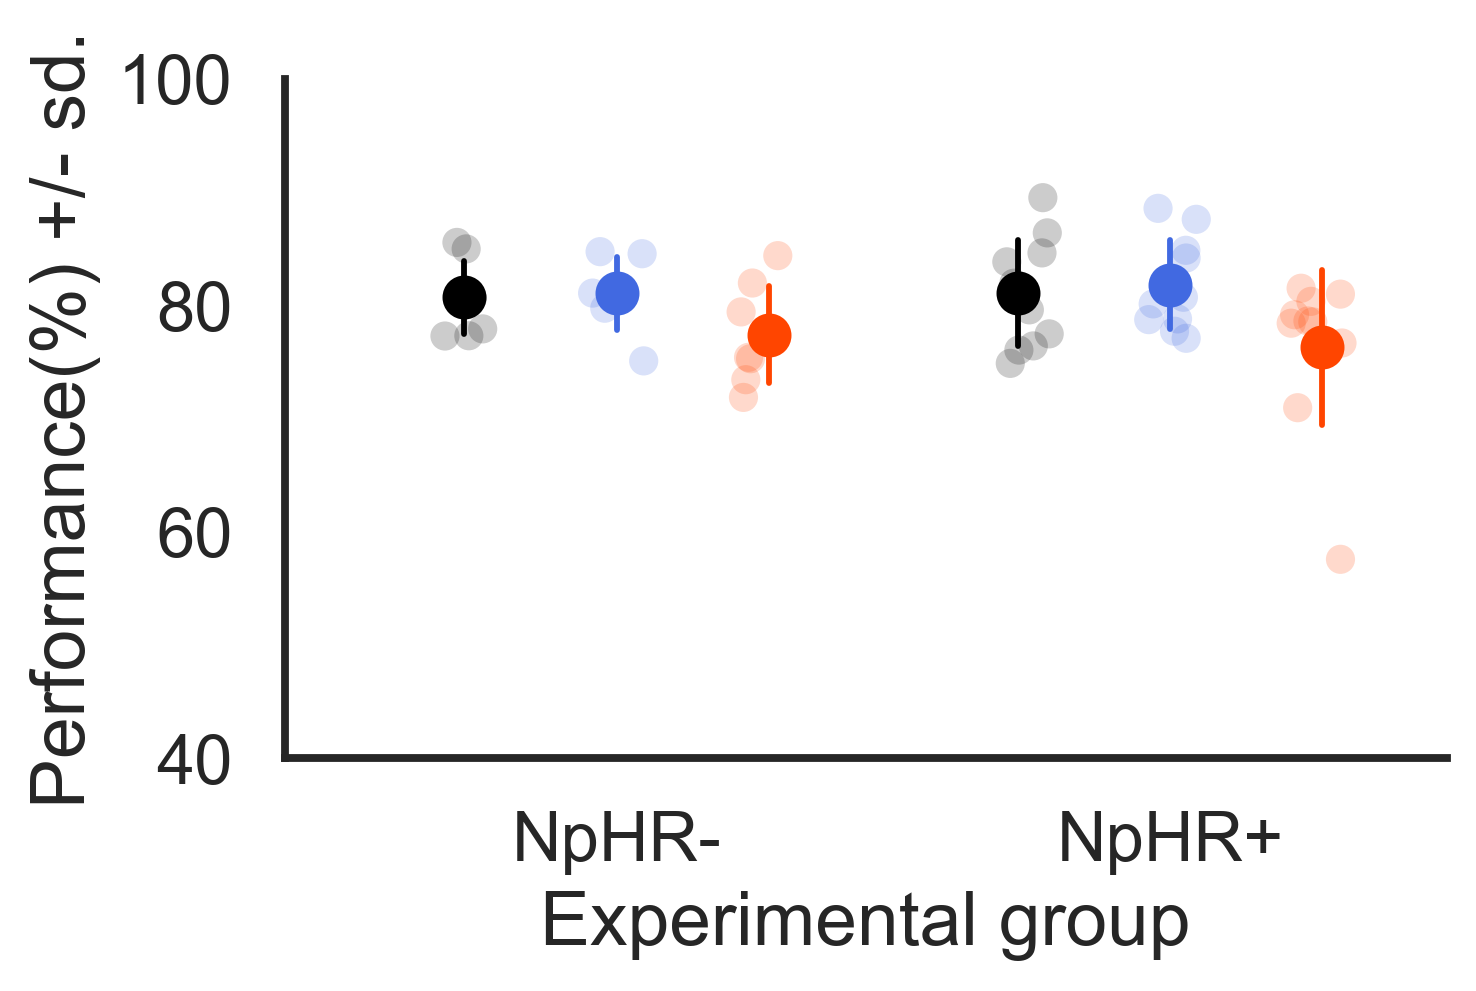

In [20]:
pooled_perfs=plot_pooled_performances(runs)

#### Plot performance variation (None - Test / Sample)

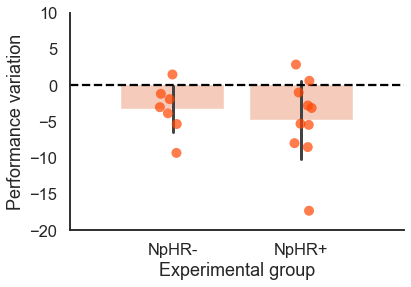

In [22]:
test_diffs=plot_performance_variation_within_each_group(pooled_perfs, [0,3])

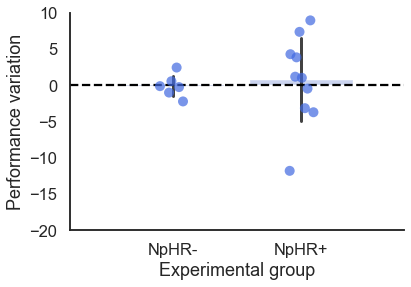

In [23]:
# Remove CTRL2 because he has no Sample data
pooled_perfs=pooled_perfs[pooled_perfs['rat']!='CTRL2']
sample_diffs=plot_performance_variation_within_each_group(pooled_perfs, [0,1])

In [25]:
from scipy.stats import ttest_ind

def normality_testing(diff):
    normality_testing = {}
    for group, data in diff.groupby(['group'])['performance']:
        stat, p = shapiro(data)
        normality_testing[group] = (stat, p)

    normality_testing = pd.Series(normality_testing)
    print(normality_testing)
    
def ttest_ind_on_diff(diff):
    ctrl_diff= diff[diff['group']=='CTRL']
    nphr_diff = diff[diff['group']=='NPHR']
    print(ttest_ind(ctrl_diff['performance'], nphr_diff['performance']))

In [26]:
#Inference testing on test performance diff
normality_testing(test_diffs)
ttest_ind_on_diff(test_diffs)

CTRL    (0.9751387238502502, 0.9327889084815979)
NPHR    (0.9363061189651489, 0.5126888751983643)
dtype: object
Ttest_indResult(statistic=0.6178774360868475, pvalue=0.545923497052565)


In [27]:
#Inference testing on sample performance diff
normality_testing(sample_diffs)
ttest_ind_on_diff(sample_diffs)

CTRL    (0.9720616340637207, 0.9059866666793823)
NPHR     (0.954388439655304, 0.7204840183258057)
dtype: object
Ttest_indResult(statistic=-0.3355244907367503, pvalue=0.7422044544840567)


#### Individual condition performances within each group

In [33]:
def plot_individual_pooled_performances(df):
    
    sns.set(style="white", context='talk')    
    plt.figure(dpi=300)
    g = sns.relplot(
        data=df, col='group',
        x='stim_condition', y='performance', hue='rat', kind='line',
        linewidth=2, marker='o', markersize=8, alpha=.6,
        height=4, aspect=1, 
    )
    g.set(
        ylabel='Performance(%)', xlabel='Illuminated period',
        ylim=(60, 100), xlim=(-.2, 1.2), xticks=[0,1],
        xticklabels=['None', 'Sample']
    )
    axes = g.axes.flatten()
    axes[0].set_title("NpHR-")
    axes[1].set_title("NpHR+")
    sns.despine()

<Figure size 1800x1200 with 0 Axes>

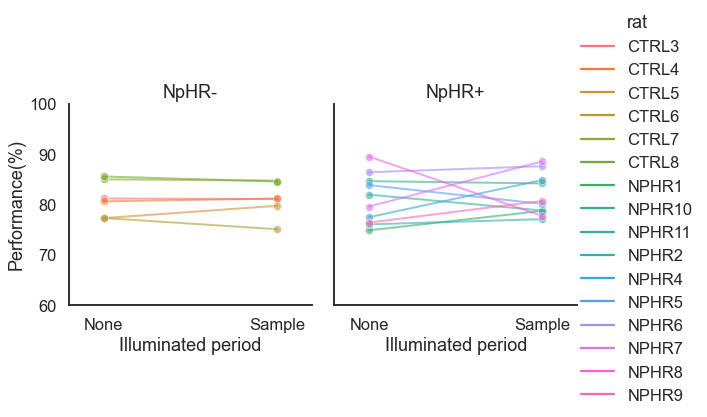

In [34]:
none_vs_sample = pooled_perfs[pooled_perfs['stim_condition']!=3]
plot_individual_pooled_performances(none_vs_sample)

<Figure size 1800x1200 with 0 Axes>

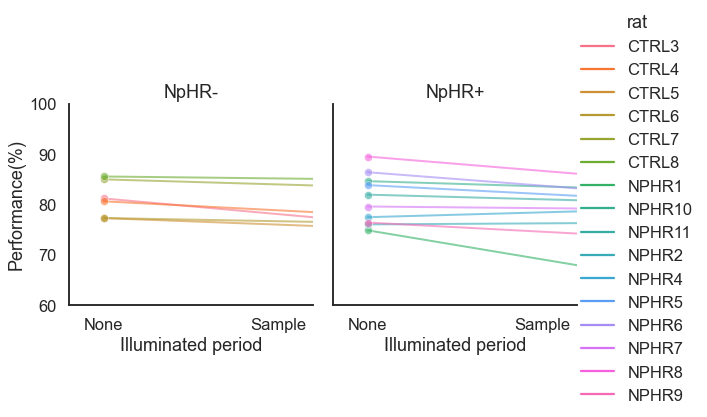

In [35]:
none_vs_test = pooled_perfs[pooled_perfs['stim_condition']!=1]
plot_individual_pooled_performances(none_vs_test)